# 1. Importing Data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#define path

path = r'/Users/office/Documents/SuperStore Analysis 04-01-24'

In [4]:
#import data
sales = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Superstore.csv'),encoding='windows-1252')

In [5]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
#list of necessary columns
columns = ['Sales','Quantity','Discount','Profit']

In [7]:
df = sales[columns]

In [8]:
df.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


# 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/office/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/office/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/office/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/office/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

[-4430069250.260376,
 -2466689485.4461737,
 -1444364350.9211,
 -1009021756.5951217,
 -824944841.7601141,
 -660372419.4367645,
 -565222592.783205,
 -458610021.09561765,
 -386759359.51813596]

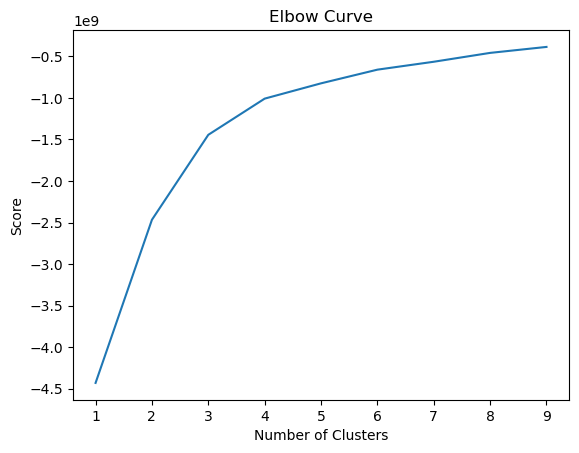

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

there's a large jump from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

# 3. k-means clustering 

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/office/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

/Users/office/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/mq/x9y4g6m5733blrm3drj7plxh0000gn/T/ipykernel_67184/1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [15]:
df.head()

,Sales,Quantity,Discount,Profit,clusters
0,261.9600,2,0.00,41.9136,1
1,731.9400,3,0.00,219.5820,0
2,14.6200,2,0.00,6.8714,1
3,957.5775,5,0.45,-383.0310,0
4,22.3680,2,0.20,2.5164,1


In [16]:
df['clusters'].value_counts()

clusters
1    8897
0     975
2     112
3      10
Name: count, dtype: int64

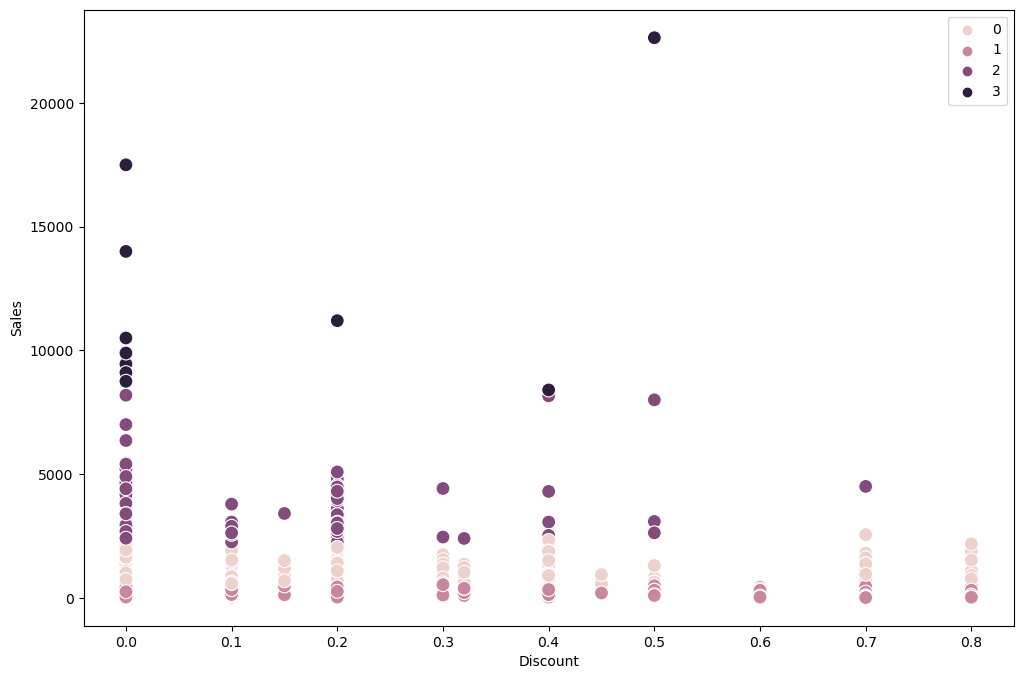

In [17]:
# Plot the clusters for the "Sales" and "Discount" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Discount'], y=df['Sales'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Discount') # Label x-axis.
plt.ylabel('Sales') # Label y-axis.
plt.show()

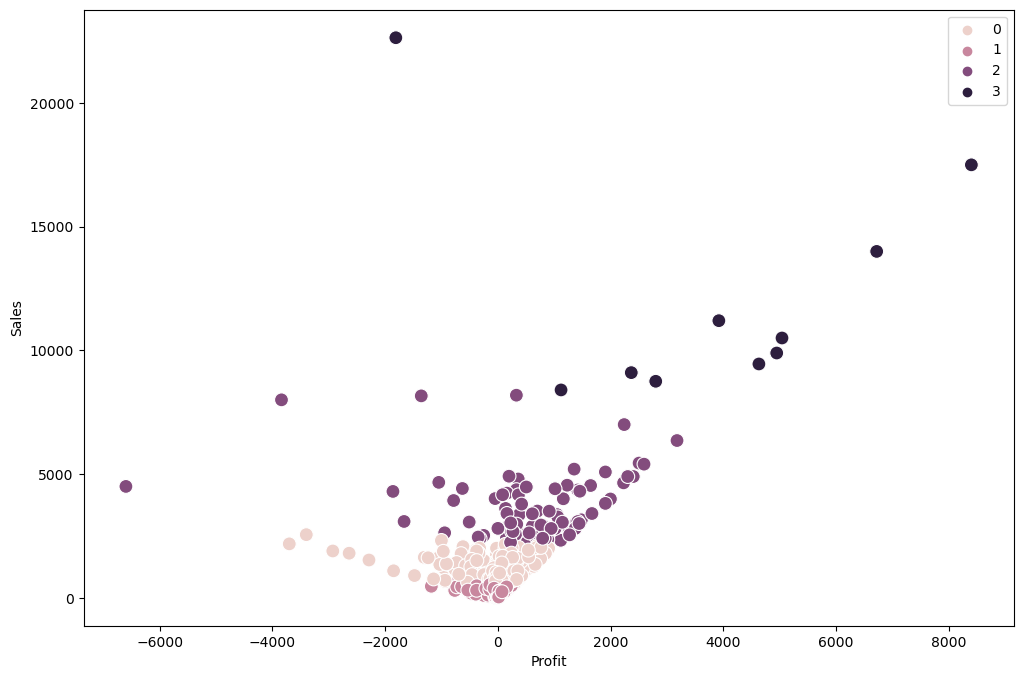

In [18]:
# Plot the clusters for the "Profit" and "Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Profit'], y=df['Sales'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Profit') 
plt.ylabel('Sales') 
plt.show()

In [19]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/mq/x9y4g6m5733blrm3drj7plxh0000gn/T/ipykernel_67184/4155924145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'


In [21]:
df.groupby('cluster').agg({'Quantity':['mean', 'median'], 
                         'Profit':['mean', 'median'], 
                         'Discount':['mean', 'median'],
                          'Sales':['mean', 'median']})

Quantity             Profit            Discount         \
                 mean median        mean    median      mean median   
cluster                                                               
dark purple  6.285714    6.0  572.424873  624.0797  0.120268    0.1   
pink         5.072821    5.0   89.434330  111.3024  0.144369    0.2   
purple       3.615488    3.0   10.897528    7.4000  0.158004    0.2   

                   Sales            
                    mean    median  
cluster                             
dark purple  3418.757059  2956.625  
pink          960.980084   844.116  
purple         96.202497    41.568